In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from linna.main import ml_sampler
from linna.util import *
%load_ext autoreload
%autoreload 2 
%matplotlib inline 

In this notebook, we sample a 2d gaussian posterior using LINNA. LINNA isn't designed for low dimension posteiors, so the performance will not be great. However, this notebook illustrates how one can use LINNA to sample posteriors. 

# Create a multivariate gaussian distribution 

In [2]:
ndim = 2
init =  np.random.uniform(size=ndim)
#mean value 
means = np.array([0.1, 1])

ndim = len(init)
#covariance matrix 
cov = np.diag([0.5, 0.2])
#Prior, Theory, and likelihood

priors = []
for i in range(ndim):
    priors.append({
        'param': 'test_{0}'.format(i),
        'dist': 'flat',
        'arg1': -2.,
        'arg2': 2.
    })

def theory(x, outdirs):
    x_new = deepcopy(x[1])
    return x_new

# Perform MCMC sampling using Linna

In [3]:
nwalkers = 4 #Number of mcmc walker
pool = None

In [4]:
outdir = os.path.abspath(os.getcwd())+"/out/2dgaussian/"
gpunode = None
chain, logprob = ml_sampler(outdir, theory, priors, means, cov, init, pool, nwalkers, gpunode, nepoch=101)

####################################################################################################
iteration: 0
####################################################################################################
####################################################################################################
iteration: 1


Initialising ensemble of 4 walkers...


####################################################################################################


Sampling progress :   0%|          | 900/1000000 [00:26<8:17:07, 33.50it/s] 

####################################################################################################
iteration: 2



Initialising ensemble of 4 walkers...


####################################################################################################


Sampling progress :   0%|          | 1200/1000000 [00:36<8:21:16, 33.21it/s]

####################################################################################################
iteration: 3



Initialising ensemble of 4 walkers...


####################################################################################################


Sampling progress :   0%|          | 4400/1000000 [02:13<8:22:26, 33.03it/s] 


In [9]:
len(chain)

76

# Check the result

In [7]:
chain_ref =  np.random.multivariate_normal(means, cov, len(chain)) #Reference point

(-2.0, 2.0)

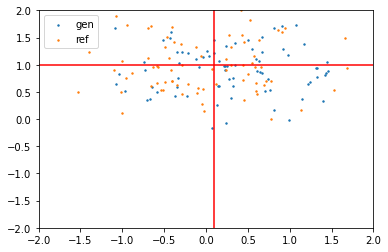

In [8]:
plt.scatter(chain[:,0], chain[:,1], label="gen",s=2)
plt.scatter(chain_ref[:,0], chain_ref[:,1], label="ref", s=2)
plt.legend()
plt.axvline(means[0], c="r")
plt.axhline(means[1], c="r")
plt.xlim(-2,2)
plt.ylim(-2,2)